In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy as cp

In [187]:
%matplotlib notebook

In [126]:
stations = pd.read_csv('./station_info.csv', skiprows=[1], encoding="ISO-8859-1")
stations = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.geoLaenge, stations.geoBreite))
stations.head(2)

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,Unnamed: 8,Unnamed: 9,Unnamed: 10,geometry
0,3,19370101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen,NaN,NaN,NaN,POINT (6.09410 50.78270)
1,11,19800901,20200930,680,47.9737,8.5205,Donaueschingen,(Landeplatz),Baden-Württemberg,NaN,NaN,POINT (8.52050 47.97370)


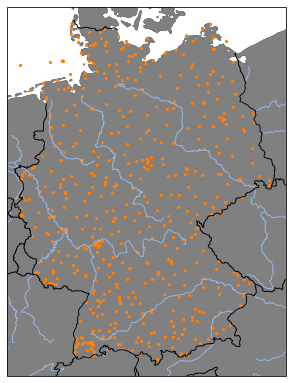

In [62]:
fig, ax = plt.subplots(1,1, figsize=(5,7), subplot_kw=dict(projection=cp.crs.AlbersEqualArea()))
stations.plot(ax=ax, transform=cp.crs.PlateCarree(), c='C1', markersize=5)
ax.coastlines(zorder=-10)
ax.add_feature(cp.feature.LAND, fc='grey')
ax.add_feature(cp.feature.RIVERS)
ax.add_feature(cp.feature.BORDERS)
plt.show()

In [254]:
winds = pd.read_csv('wind_speed.csv')

In [255]:
winds['u'] = winds['F'] * np.cos(winds['D']*np.pi/180)
winds['v'] = winds['F'] * np.sin(winds['D']*np.pi/180)

In [256]:
winds.MESS_DATUM = pd.to_datetime(winds.MESS_DATUM)
winds = winds.groupby([winds.MESS_DATUM.dt.dayofyear, winds.STATIONS_ID]).mean()
winds.head()

QN_3          F           D         u         v
MESS_DATUM STATIONS_ID                                                 
1          90            1.0   3.270833  227.083333 -1.721380 -2.480362
           96            1.0   0.000000    0.000000  0.000000  0.000000
           102           1.0  11.041667  223.333333 -7.414805 -7.208757
           125           1.0   1.783333  209.583333 -0.504968 -1.078168
           161           1.0   2.608333  184.583333 -2.122727 -0.306100

In [266]:
merged = stations.merge(winds, left_on='Stations_id', right_on=winds.index.get_level_values(0)).iloc[:,:]
merged.shape

(834, 17)

In [267]:
merged['x'] = merged.geometry.x
merged['y'] = merged.geometry.y

In [268]:
from matplotlib import animation

<IPython.core.display.Javascript object>


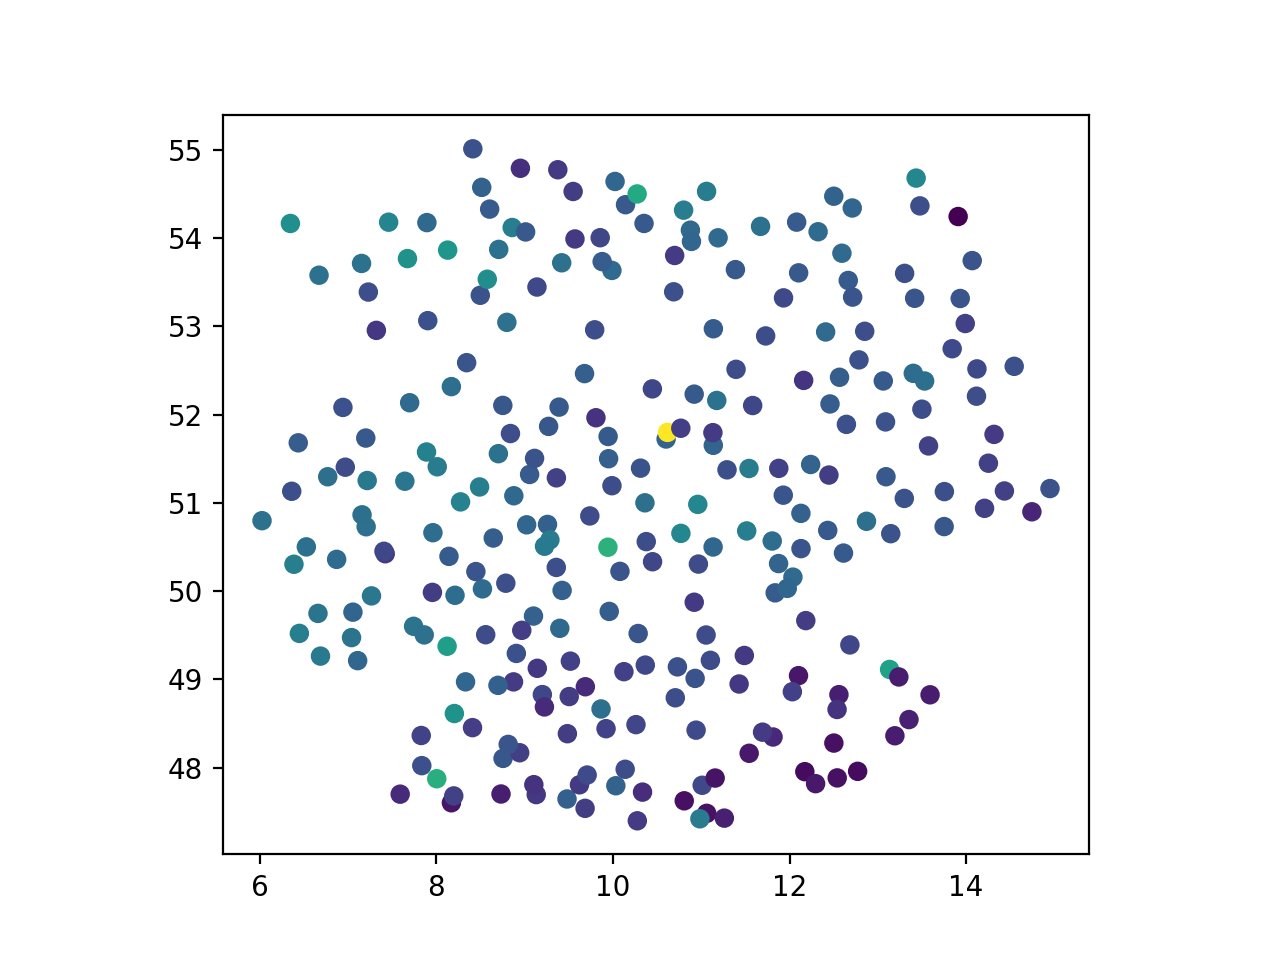

In [242]:
fig, ax = plt.subplots()
df.plot(ax=ax, column='F')

def animate(i):
    time = list(set(merged.MESS_DATUM.values))[i]
    
    ax.clear()
    df = merged[merged.MESS_DATUM==time]
    print(df)
    
    df.plot(ax=ax, column='F')

In [243]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=0.1)
plt.show()